In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
filename = input('Please key in the filename: ')
df  = pd.read_csv(filename)

In [2]:
path =''

frames =[]
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
df = result
df.to_csv('sales2019.csv', index= False)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (Temp/ipykernel_9752/1911239636.py, line 1)

In [2]:
df = pd.read_csv('sales2019.csv')

In [3]:
df['Month'] = df['Order Date'].str[0:2]
df = df.dropna(how='all')

df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [4]:
# What was the best month for sales ? how much that month?
df['Sales'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer') * pd.to_numeric(df['Price Each'], downcast='integer')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99


In [5]:
moving_col = df.pop('Sales')
df.insert(4, 'Sales', moving_col)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [6]:
df.groupby('Month').sum()['Sales']

Month
01    1822256.73
02    2202022.42
03    2807100.38
04    3390670.24
05    3152606.75
06    2577802.26
07    2647775.76
08    2244467.88
09    2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

In [7]:
sales_value = df.groupby('Month').sum()['Sales']
sales_value.max()

4613443.34

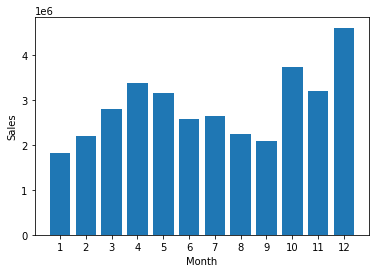

In [8]:
months = range(1,13)
plt.bar(x=months, height = sales_value)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [10]:
#Sales value cities
address_to_city = lambda address:address.split(',')[1]

In [11]:
df['City'] = df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [12]:
sales_city = df.groupby('City').sum()['Sales']
sales_city

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

In [13]:
cities = [city for city,sales in sales_city.items()]

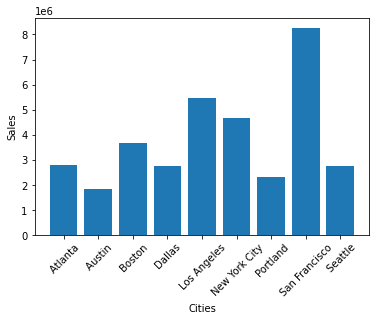

In [14]:
plt.bar(x=cities, height = sales_city)
plt.xticks(cities, rotation = 45)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.show()

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [17]:
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,141234,iPhone,1,700,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [18]:
sales_value_hours = df.groupby('Hour').sum()['Sales']
hours = [hour for hour,sales in sales_value_hours.items()]


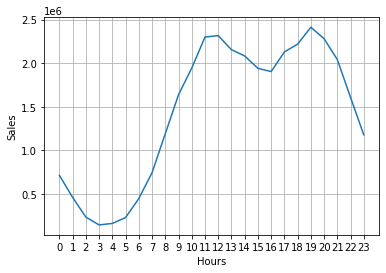

In [19]:
plt.plot(hours,sales_value_hours)
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.show()

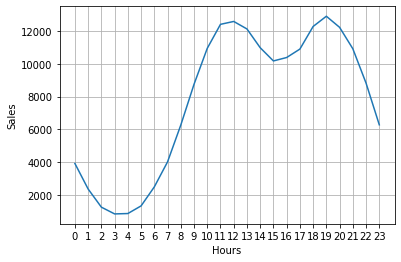

In [20]:
sales_value_hours = df.groupby('Hour').count()['Sales']
hours = [hour for hour,sales in sales_value_hours.items()]
plt.plot(hours,sales_value_hours)
plt.grid()
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sales')
plt.show()

In [74]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin


In [77]:
#Sold together
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin
57,141290,Apple Airpods Headphones,1,150,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles
133,141365,Vareebadd Phone,1,400,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City


In [23]:
groupProduct = lambda product : ', '.join(product)

In [24]:
df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup.head()

C:\Users\NgocSon\AppData\Local\Temp/ipykernel_13152/183331901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,All Product
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1,150,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11,"Vareebadd Phone, Wired Headphones"


In [25]:
df_dup = df_dup[['Order ID', 'All Product']].drop_duplicates()
df_dup

,Order ID,All Product
41,141275,"USB-C Charging Cable, Wired Headphones"
57,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,"Vareebadd Phone, Wired Headphones"
153,141384,"Google Phone, USB-C Charging Cable"
220,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
186781,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
186783,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
186791,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [26]:
df_dup['All Product'].value_counts().head(10)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Product, dtype: int64

In [48]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour
0,141234,iPhone,1,700,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [52]:
df =df.drop(columns=['Hour'])

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99


In [11]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],downcast= 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'],downcast= 'integer')

In [9]:
all_products = df.groupby('Product').sum()['Quantity Ordered']

In [13]:
prices = df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [15]:
product_ls = [product for product, quant in all_products.items()]

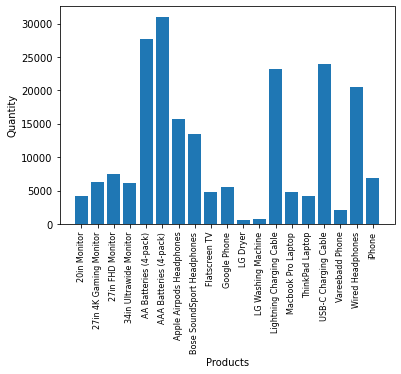

In [16]:

plt.bar(product_ls, all_products)
plt.xticks(product_ls, rotation = 90, size =8)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()

C:\Users\NgocSon\AppData\Local\Temp/ipykernel_1156/4123451645.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x,rotation = 90, size = 8)


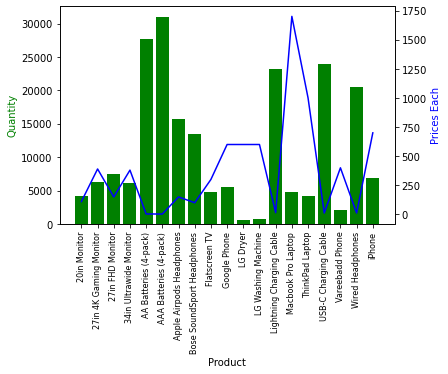

In [28]:
x = product_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(x,rotation = 90, size = 8)

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Prices Each', color='b')

plt.show()